In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [3]:
df = pd.read_excel("9 вариант.xlsx", engine='openpyxl')
df.head()

,Людинопотік,Середній дохід населення,Школа,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ з дому
0,5211.0,15610.0,0,0,0,0,0
1,2424.0,12600.0,0,0,1,0,0
2,3868.0,12600.0,0,0,0,0,1
3,4546.0,13930.0,0,0,0,0,0
4,3244.0,16030.0,0,0,0,0,0


In [4]:
df.shape

(69, 7)

In [5]:
df.dtypes

Людинопотік                         float64
Середній дохід населення            float64
Школа                                 int64
Продуктовий ринок                     int64
Речовий ринок                         int64
Транзитна зупинка міжміського ГТ      int64
Зупинка ГТ з дому                     int64
dtype: object

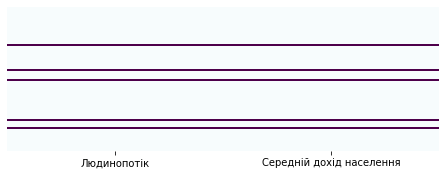

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > df.shape[0]*0.01].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),cbar=False, yticklabels=False, cmap='BuPu', ax=ax)
plt.show()

In [7]:
pd.DataFrame(df.isnull().sum())

,0
Людинопотік,5
Середній дохід населення,5
Школа,0
Продуктовий ринок,0
Речовий ринок,0
Транзитна зупинка міжміського ГТ,0
Зупинка ГТ з дому,0


In [8]:
#missing data is numeric, so let's recover it accordingly
dfm = df
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Людинопотік']] = imputer_mean.fit_transform(dfm[['Людинопотік']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()

In [9]:
dfm.describe()

,Людинопотік,Середній дохід населення,Школа,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ з дому
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2755.782609,11990.391304,0.072464,0.115942,0.086957,0.072464,0.246377
std,1981.850301,2474.008472,0.261154,0.322501,0.283836,0.261154,0.434057
min,233.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1296.000000,11060.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2269.000000,12180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3880.000000,13300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10016.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dfm.corr()

,Людинопотік,Середній дохід населення,Школа,Продуктовий ринок,Речовий ринок,Транзитна зупинка міжміського ГТ,Зупинка ГТ з дому
Людинопотік,1.000000,0.244975,-0.117771,0.087680,0.000531,0.018102,0.042476
Середній дохід населення,0.244975,1.000000,0.015205,-0.273949,-0.034813,0.000866,-0.025837
Школа,-0.117771,0.015205,1.000000,0.073386,-0.086258,-0.078125,-0.030083
Продуктовий ринок,0.087680,-0.273949,0.073386,1.000000,0.370204,-0.101222,0.213153
Речовий ринок,0.000531,-0.034813,-0.086258,0.370204,1.000000,0.112136,0.301007
Транзитна зупинка міжміського ГТ,0.018102,0.000866,-0.078125,-0.101222,0.112136,1.000000,0.099649
Зупинка ГТ з дому,0.042476,-0.025837,-0.030083,0.213153,0.301007,0.099649,1.000000


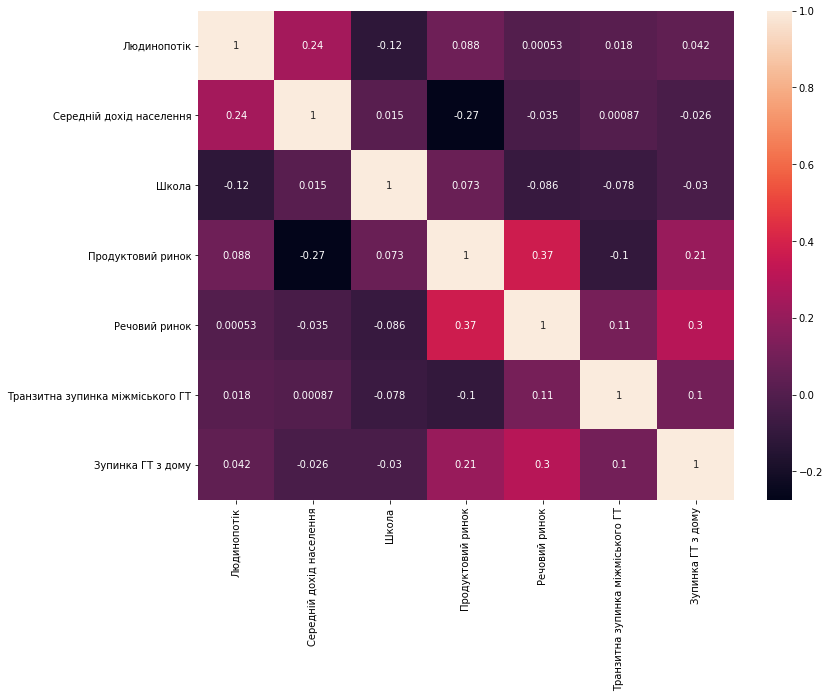

In [11]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [13]:
#encoding
dfs = dfm[['Людинопотік']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Людинопотік,65,"[5211.0, 2424.0, 3868.0, 4546.0, 3244.0, 2560....",float64


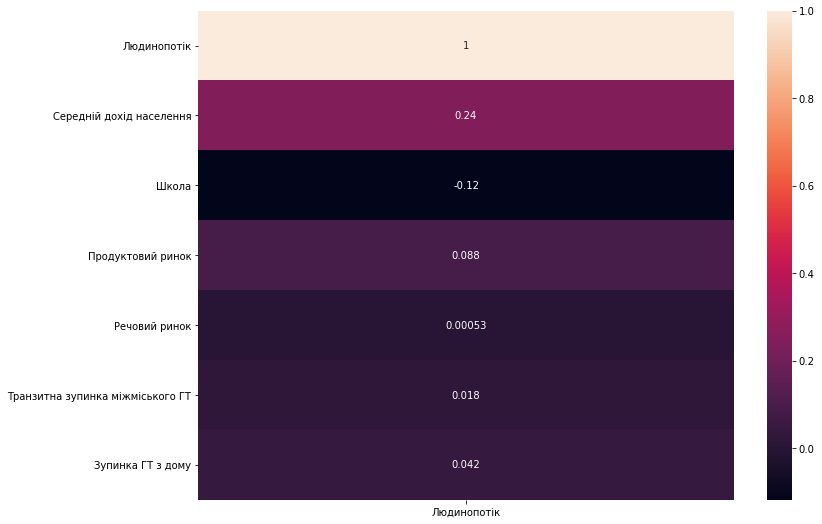

In [15]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[['Людинопотік',]], annot=True)
plt.show()

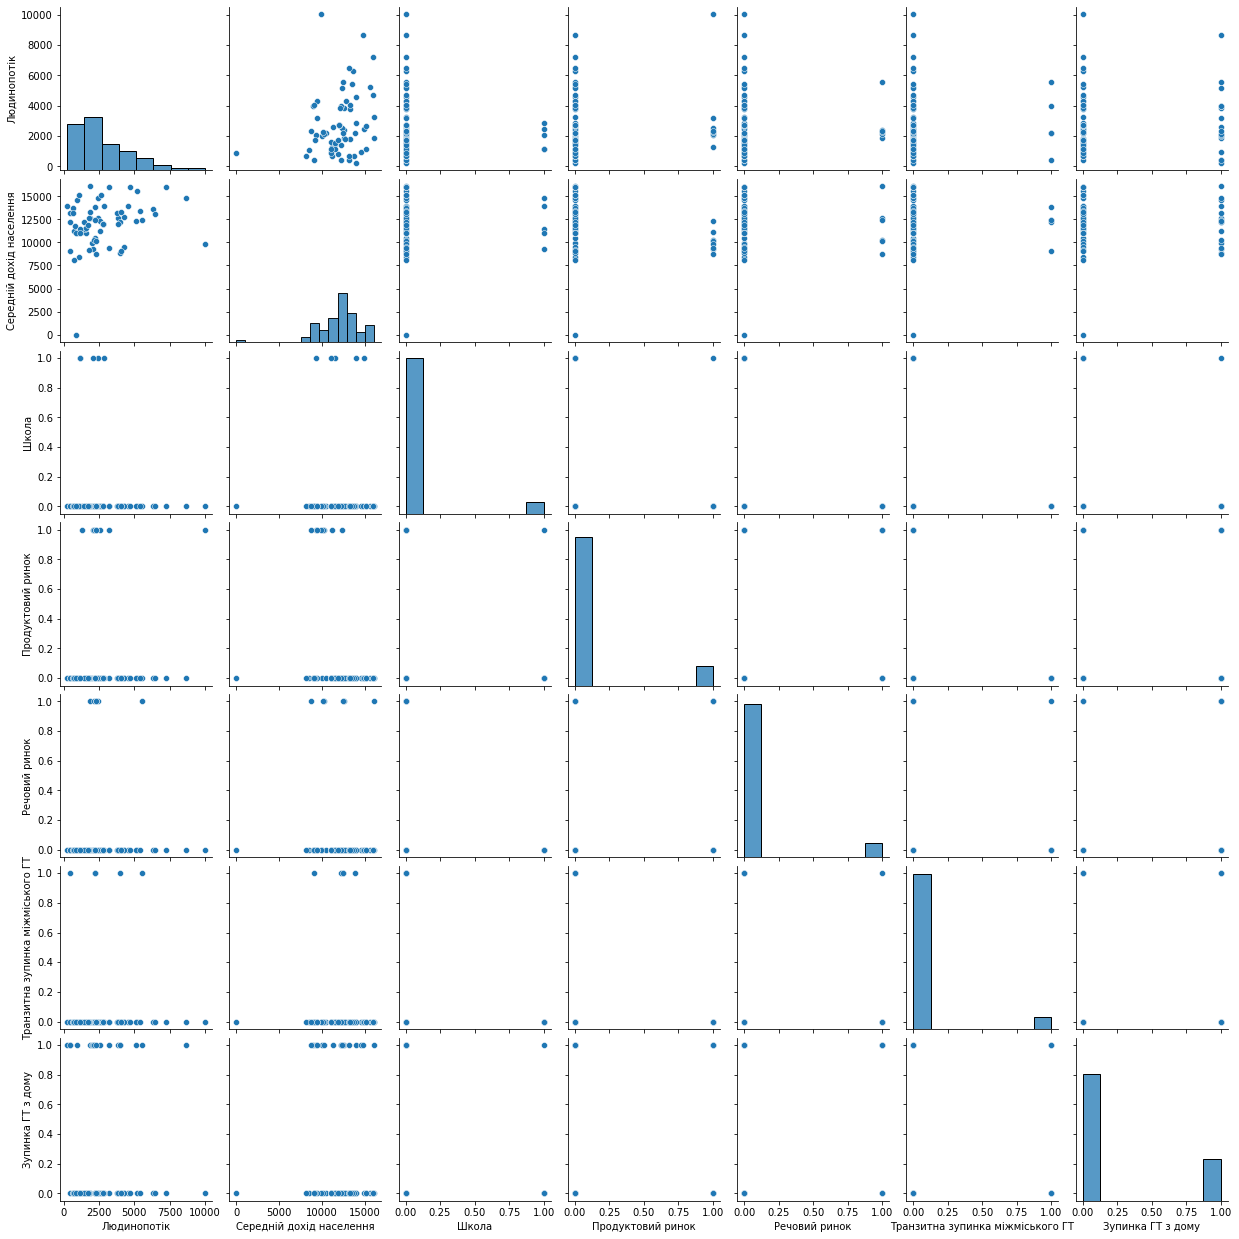

In [16]:
sns.pairplot(dfm)

In [17]:
#linear regression
#Splitting the dataset into the Training set and Test set
feature_name = ['Людинопотік','Школа','Продуктовий ринок','Речовий ринок']
X =dfm[feature_name]
y = dfm['Середній дохід населення']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
# Fitting Simple Linear Regression to the Training set
f1 = ['Людинопотік']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([0.26182571]), 11194.692802678257)

In [19]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.046, 0.113)

In [20]:
print(mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

2482.31


1949.82

In [21]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

(array([ 3.24040777e-01,  7.91557879e+02, -2.48142293e+03,  1.66966430e+02]),
 11204.364938432747)

In [22]:
# Predicting the Test set results
y_pred2 = mr.predict(X_test)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

(0.133, 0.255)

In [23]:
print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred2, squared=False).round(2)

2365.92


1786.54

In [24]:
# Checking p-values
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

const                2.796665e-24
Людинопотік          5.523090e-02
Школа                5.127908e-01
Продуктовий ринок    5.656650e-02
Речовий ринок        9.031747e-01
dtype: float64

In [25]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Середній дохід населення   R-squared:                       0.133
Model:                                  OLS   Adj. R-squared:                  0.064
Method:                       Least Squares   F-statistic:                     1.917
Date:                      Tue, 28 Dec 2021   Prob (F-statistic):              0.122
Time:                              01:17:01   Log-Likelihood:                -505.33
No. Observations:                        55   AIC:                             1021.
Df Residuals:                            50   BIC:                             1031.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.12e+04    597.198     18.762      0.000       1e+04    1.24e+04
Людинопотік           0.3240      0.165      1.963      0.055      -0.008       0.656
Школа               791.5579   1200.782      0.659      0.513   -1620.284    3203.400
Продуктовий ринок -2481.4229   1271.310     -1.952      0.057   -5034.924      72.078
Речовий ринок       166.9664   1365.547      0.122      0.903   -2575.815    2909.748
==============================================================================
Omnibus:                       42.211   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.568
Skew:                          -1.991   Prob(JB):                     3.74e-40
Kurtosis:                      10.960   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Fitting Polynomial Regression to the dataset
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 3.24040777e-01,  7.91557879e+02, -2.48142293e+03,  1.66966430e+02]),
 11204.364938432747)

In [27]:
# Predicting the Test set results
y_pred = pr.predict(X_test)

# Coefficient of determination R^2
pr.score(X_train, y_train).round(3), pr.score(X_test, y_test).round(3)

(0.133, 0.255)

In [28]:
# Mean squared error
print(mean_squared_error(y_train, pr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

2365.92


1786.54

In [29]:
# Fitting Random Forest to the Training set
rf = RandomForestRegressor(n_estimators = 2, max_leaf_nodes = 25, random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)

# Metrics
metrics(X_train, X_test, y_train, y_test, rf_y_pred, rf).round(2)

,RMSE,R2
Train,1910.19,0.43
Test,1933.52,0.13


In [30]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature_, round(importance, 2)) for feature_, importance in zip(feature_name, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Людинопотік          Importance: 0.83
Variable: Продуктовий ринок    Importance: 0.17
Variable: Школа                Importance: 0.0
Variable: Речовий ринок        Importance: 0.0


In [34]:
#Выводы: Мы видим что все модели имеют плохие показатели R2.
    #Исходя из R2 лучшей моделью будет Random Forest.